In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration globale pour l'affichage pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)  # Optionnel : limite le nombre de lignes affichées


In [3]:
data=pd.read_csv("../data/RAW_interactions.csv")

Exploration initiale

In [4]:
##Aperçu des données
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [5]:
##Affichage aleatoire de 10 lignes
data.sample(10)

,user_id,recipe_id,date,rating,review
995638,488441,468448,2011-12-05,5,"Nice job, chef! I loved all the veggies with the bacon and poblano! I like the fact that the calorie count is low, so this is a good diet soup, too. Here's hoping you win! Made for CrazE contest 2011"
761638,67728,349048,2009-04-16,5,"We really liked this recipe a lot. It felt like they were so much easier to make than my usual enchilada recipe, and they were definitely better for us because they weren't buried in piles of cheese. I had quite a bit of cooked shredded chicken in the fridge already, so I didn't use the poached chicken part of this recipe, but everything else was as written. The salsa verde was really good, too -- I had around 2 cups left over, so maybe I'll make some bistec en salsa verde with it. We'll definitely be enjoying these again. Thanks for posting! Made for PAC Spring 09"
1112865,7798,81908,2007-12-31,5,"These were simple to make, and I happened to have everything on hand. I poached one (single) chicken breast in chicken broth, which was enough meat for six enchiladas. I subbed Trader Joe's enchilada sauce (from a bottle) for the salsa, as my DH doesn't like spicy food. After frying each tortilla in hot oil for a few seconds, I dipped each one in the enchilada sauce before filling it. I then poured some of the enchilada sauce down the middle of the tortillas in my 9x9 pan before sliding it into the oven. I will make these again, thanks for sharing your recipe, Barb!"
930711,1536380,162842,2015-01-02,5,"Hi&lt;br/&gt;I made this pretty well the way it said too, the only thing is I didn&#039;t have parsley, so I used cilantro, and it turned out quite good..Will make again.."
1065714,16827,13745,2002-01-03,5,I made these with my usual christmas cookies and they got a great review from family and friends. Were really easy to make. I used cherry and lime jello. Will definitely make again.
1012301,653438,381760,2010-04-21,5,Made this tonight for dinner and all I can say is WOW!!!! Followed the recipe except for cutting in in half and WOW!!!! Definately goinging into my Favorites of 2010. Thank you for a great recipe....Made for SPRING PAC 2010.
455569,727964,126673,2009-06-14,5,"My husband thinks these are the best burgers he has ever eaten! I think the sesame oil is essential to the flavor of the recipe, although I could have done without the seeds. We grilled on the outdoor grill and served with a dollop of mayo on whole wheat rolls."
423066,140806,251903,2009-05-18,4,"Really liked this, 1yo DS did not...I made it for him because he loves veggie lasagna. Oh well! Seems this dish is just lacking a little substance, I think it's because I prefer ricotta over cottage cheese. Other than that, this is a great standard to keep in your cookbook!"
740065,2760919,375578,2013-03-29,5,"These were awesome! They all were gone in no time. I followed the recipe perfectly and the results were great, golden, crispy and salty.&lt;br/&gt;&lt;br/&gt;Thanks for sharing..."
1005849,452940,244755,2007-12-12,4,"This was really good. Very nice blend of flavors. This is the first fondue recipe I ever made. It was much simpler than I had thought although it is definitely a recipe you want to have all your ingredients measured out and ready, as things go quite fast introducing the ingredients. Thanks for sharing MM.\r\n-Bird-"


In [6]:
##Structure des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [7]:
##la taille des données
nombre_de_lignes, nombre_de_colonnes = data.shape
print(f"le nombre de lignes est : {nombre_de_lignes}")
print(f"le nombre de colonnes est : {nombre_de_colonnes}")

le nombre de lignes est : 1132367
le nombre de colonnes est : 5


Nous disposons un dataset contenant 113236 observations et 5 variables decrivatnt les interactions des utilisateurs avec le recettes de cuisines,et ci-dessous la description des variables:
- user_id : identifiant unique de l'utilisateur
 - recipe_id : identifiant unique de la recette
 - rating : note attribuée par l'utilisateur à la recette (échelle de 1 à 5)
 - date: date de l'interaction
 - review: commentaire textuel laissé par l'utilisateur sur la recette.

In [8]:
##Detection des nombres des valeurs manquantes par colonne
print(data.isnull().sum())


user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [9]:
##Detection de pourcetage des valeurs manquantes par colonne
print(data.isna().mean()*100)

user_id      0.000000
recipe_id    0.000000
date         0.000000
rating       0.000000
review       0.014924
dtype: float64


In [10]:
##detection des pourcentages des valeurs manquantes du dataset
print(data.isna().mean().mean()*100)

0.0029848980056819035


In [11]:
##interpretation des valeurs manquantes:nous observons que la colonne review a 0,015% de valeurs manquantes.il est trop faible comme pourcentage et nous pouvons les ignorer,comme il s'agit des données textuelles liée a des avis des utilisatures sur les recettes,alors nous pouvons les imputer par des descriptions dependants des autres colonnes,comme le note de la recette

In [12]:
##affichage des lignes dont la note est superieur ou egale a 4 et la colonne review,afin de pouvoir voir comment les commentaire sont formulés.
data[data['rating']<4].sample(5)

,user_id,recipe_id,date,rating,review
72801,2000045332,188352,2015-10-17,0,very nice but where is the LEMON??
76337,2002012541,230385,2018-02-24,0,It looks and smells great!
892785,640041,41524,2007-11-06,3,"This recipe is very americanized. It did not have an authentic caribbean or indian vibe. The flavor was bland for what I prefer in a curry. To make it better I'd reduce the amount of water as to not drown out the flavors of all the other ingredients and I'd also add some more salt as well as garlic. Other then that I'd say it was pretty good, very hardy."
816842,1803174267,466272,2014-09-27,0,"LOVE THESE!! I use 1/2 dates and 1/2 pitted prunes. Also add about 1/2 cup instant (decaf) coffee so the batter is less stiff!! CRAVE-able!!! Thank you, Kate-- for a TRULY sugar-free, scrumptious brownie!!"
458389,193516,307578,2008-06-28,3,"This salad was okay, but I found was kind of lacking in flavour or perhaps just needed a little bit of sweetness or more tang. It looked great with the shreds of carrot, green chives and yellow base from the tumeric. I used fat free sour cream and light miracle whip. Definitely a different potato salad than what I am used to. Thanks! Reviewed during ZWT 4."


In [13]:
####Affichons les lignes qui ont des valeurs manquantes dans la colonne review.
data[data['review'].isnull()].sample(5)

,user_id,recipe_id,date,rating,review
572490,2001774915,361331,2017-11-02,5,NaN
56957,2001567544,9054,2017-06-03,5,NaN
437204,2002151317,113861,2018-05-13,5,NaN
959664,2001893685,211082,2017-12-27,5,NaN
479544,2001489301,26370,2017-04-15,5,NaN


In [14]:
###affiché les nombres des valeur manquantes de la colonne par ligne en fonction de la note
print(data[data['review'].isnull()]['rating'].value_counts())

rating
5    135
4     27
3      3
1      3
2      1
Name: count, dtype: int64


In [15]:
##Nous allons imputer les valeurs manquantes de la colonne review en fonction de la note(rating) de la recette.
def imputer_review(row):
    if pd.isnull(row['review']):
        if row['rating'] == 5:
            return "Excellent recipe! Loved it!"
        elif row['rating'] == 4:
            return "Great recipe, will make again."
        elif row['rating'] == 3:
            return "Good recipe, but could be improved."
        elif row['rating'] == 2:
            return "Not my favorite."
        elif row['rating'] == 1:
            return "Did not like this recipe at all."
    else:
        return row['review']



In [16]:
##Application de la fonction d'imputation
data['review'] = data.apply(imputer_review, axis=1)

# Vérifions les valeurs manquantes après l'imputation
print("Valeurs manquantes après imputation :")
print(data['review'].isnull().sum())

Valeurs manquantes après imputation :
0


In [17]:
# Créer une liste des commentaires imputés
commentaires_imputes = [
    "Excellent recipe! Loved it!",
    "Great recipe, will make again.",
    "Good recipe, but could be improved.",
    "Not my favorite.",
    "Did not like this recipe at all.",
]

# Créer la colonne indicatrice (1 = imputé, 0 = original)
data['review_imputed'] = data['review'].isin(commentaires_imputes).astype(int)

# Vérifier les résultats
print("Nombre de reviews par type :")
print(data['review_imputed'].value_counts())
print("\nPourcentage :")
print(data['review_imputed'].value_counts(normalize=True) * 100)

Nombre de reviews par type :
review_imputed
0    1132197
1        170
Name: count, dtype: int64

Pourcentage :
review_imputed
0    99.984987
1     0.015013
Name: proportion, dtype: float64


In [18]:
##Affichons nombre total des donnée observé avant et après le traitement des valeurs manquantes
print(f"Nombre total de lignes dans le dataset après traitement des valeurs manquantes : {data.shape[0]}")


Nombre total de lignes dans le dataset après traitement des valeurs manquantes : 1132367


In [19]:
##Affichage des dataset aprés traitement des valeurs manquantes
data.head()

,user_id,recipe_id,date,rating,review,review_imputed
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,0
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",0
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.,0
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",0


In [20]:
###Detection des doublons
print(f"Nombre de doublons dans le dataset : {data.duplicated().sum()}")

Nombre de doublons dans le dataset : 0


In [21]:
##affichons les utilisateurs qui ont commenté plus d'une fois la même recette.
data[data.duplicated(subset=['user_id', 'recipe_id'], keep=False)]


,user_id,recipe_id,date,rating,review,review_imputed


Nous observons qu'il y'a pas de doublons.

In [22]:
##conversions des types de données
data['date']=pd.to_datetime(data['date'])
data['user_id']=data['user_id'].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1132367 non-null  category      
 1   recipe_id       1132367 non-null  int64         
 2   date            1132367 non-null  datetime64[ns]
 3   rating          1132367 non-null  int64         
 4   review          1132367 non-null  object        
 5   review_imputed  1132367 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(1)
memory usage: 57.3+ MB
None


In [23]:
###Verification si les données sont cohérentes et valides,affichon les lignes dont la note est inferieur a 3
data[data['rating'] <= 3].sample(5)

,user_id,recipe_id,date,rating,review,review_imputed
891583,191533,157745,2006-09-12,2,"These were heavier and more tough than I was hoping for. I may have over-kneaded them though, I'm not sure. And I would say this makes more like 12 rolls, unless you want huge ones. Definitely is an easier recipe than most yeast breads.",0
594716,1197286,34382,2009-03-09,3,These were good but not wow and I had to add more butter. I would make them again though.,0
725653,1767153,8654,2011-01-18,0,"This was pretty decent - a very basic crock pot recipe. I didn't notice anything special about it, taste-wise, when compared to other beef crock pot recipes. I wasn't home when it was done, so I had my husband turn the pot off and remove the meat from the juices. <br/><br/>When I got home, I threw part of the meat in a skillet - especially the edges of the roast that were covered with the mixture (reserved the middle part of the roast for something else - probably gonna make BBQ meat with it) and added a couple of cups of the juice from the crock pot to the skillet, as well. After the beef was shredded and mixed with the extra juice, the flavor was a bit bland. I then added cumin, garlic, jalapeño hot sauce, cayenne pepper and some Mexican chili powder. Those things pepped it up quite a bit, and allowed me to season it to our preferences.<br/><br/>In retrospect, I wish I would have added some canned peppers in adobo to the crockpot mixture. I have a chicken recipe that literally can't be beat, and the recipe includes that component - I think it really makes the meat flavorful. <br/><br/>If you didn't want to bother separating the meat by my method (the middle part of the roast untouched by the Mexican-inspired flavor), the meat would be fine with some spicy BBQ sauce. The flavors would meld fine, so no real big deal either way. <br/><br/>Toppings that taste good with my bastardized version? Sour cream, Mexican cheese, and raw onions.",0
607471,606053,11824,2007-10-05,3,Instead of seasoning salt I used 2 tbsp of Garden Ranch popcorn seasoning and also some salt. I got nothing but compliments and was asked if there were any left for seconds.,0
136452,683416,363832,2010-01-17,0,"WHAT A SURPRISE!!! \nIt had a very good flavor...Did not taste anything like what I was expecting. I'm not rating it now because I cooked it in the microwave and know that it affected the texture (boiled over). What a nice alternative for a custard lover who can no longer have milk. I will be making this the first time I need a desert . The ingredients were what made me try it. I""ll rate this once I have cooked it in the oven, and in a crust.",0


nous observons que plusieurs lignes du jeu de données présentent une note égale à 0 (rating = 0), tout en contenant un commentaire textuel (review) souvent positif ou négatif.
Cette situation est incohérente : une note de 0 ne correspond pas à une appréciation valide sur une échelle de 1 à 5, et le contenu des commentaires indique que les utilisateurs ont bien exprimé une opinion sur la recette.

Nous en déduisons que la valeur 0 ne traduit pas une mauvaise note, mais plutôt l’absence de note — autrement dit, une valeur manquante codée par 0.

En conséquence, nous considérons toutes les notes égales à 0 comme valeurs manquantes et nous les remplaçons par NaN afin de ne pas biaiser les statistiques descriptives ni les calculs de moyennes.
Cela revient à interpréter ces cas comme des utilisateurs ayant laissé un commentaire sans attribuer de note chiffrée.

In [24]:
##remplacons les notes invalides par NaN
data.loc[data['rating'] == 0, 'rating'] = np.nan

In [25]:
##verifions les valeurs manquantes après le remplacement
print(data['rating'].isnull().sum())

60847


Analyse descriptive

In [26]:
##Nous allons commencer a etudié d'abord comment la note(rating) valide est distribuée dans le dataset.
data=data[data['rating'].notna()]

In [27]:
data['rating'].describe()

count    1.071520e+06
mean     4.661499e+00
std      7.230534e-01
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [28]:
data['rating'].value_counts(normalize=True)*100

rating
5.0    76.187472
4.0    17.485441
3.0     3.812808
2.0     1.318034
1.0     1.196245
Name: proportion, dtype: float64

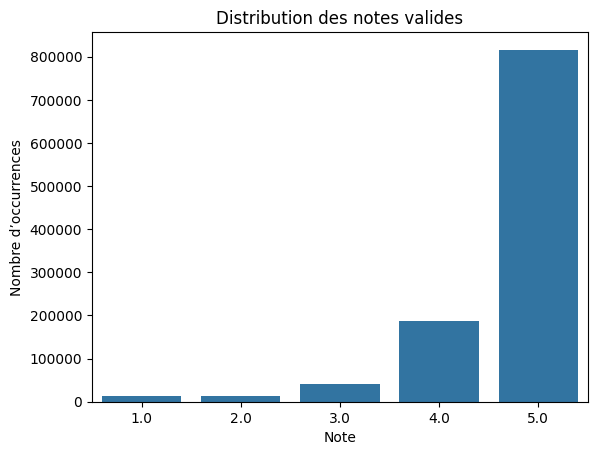

In [29]:
sns.countplot(x='rating', data=data)
plt.title("Distribution des notes valides")
plt.xlabel("Note")
plt.ylabel("Nombre d’occurrences")
plt.show()

L’analyse univariée de la variable rating met en évidence une forte concentration des évaluations sur les valeurs hautes de l’échelle (4 et 5).
Ce biais positif traduit une satisfaction générale élevée sur la plateforme, mais il indique aussi que la variable rating n’est pas symétriquement distribuée.

In [30]:
###Calculons le nombre totale d interactions par utilisateur
interactions_user = data['user_id'].value_counts()
interactions_user.describe()

count    226570.000000
mean          4.729311
std          49.084643
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        7665.000000
Name: count, dtype: float64

In [31]:
##Etudions maintenant la variable userid en determinons le top 10 des utilisateurs qui ont le plus interagi avec les recettes en fonction du nombre d'avis laissés.
top_users = data['user_id'].value_counts().sample(10)
print(top_users)


user_id
801735        1
2001838730    1
650390        0
2000215463    1
2000296770    1
1396987       1
2000570486    0
2000734480    0
1254824       1
2001450885    1
Name: count, dtype: int64


In [32]:
##calculons la note moyenne par recette
data['avg_rating']= data.groupby('recipe_id')['rating'].mean()
data['avg_rating'].describe()

count    214510.000000
mean          4.580322
std           0.629917
min           1.000000
25%           4.333333
50%           4.888889
75%           5.000000
max           5.000000
Name: avg_rating, dtype: float64

In [33]:
data.drop(columns=['avg_rating'],inplace=True)

In [34]:
data['avg_rating'] = data.groupby('recipe_id')['rating'].transform('mean')


In [35]:
#afficher tous les avis de la recette 40893
data.head()



,user_id,recipe_id,date,rating,review,review_imputed,avg_rating
0,38094,40893,2003-02-17,4.0,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,0,4.5
1,1293707,40893,2011-12-21,5.0,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",0,4.5
2,8937,44394,2002-12-01,4.0,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,0,4.0
3,126440,85009,2010-02-27,5.0,I made the Mexican topping and took it to bunko. Everyone loved it.,0,5.0
4,57222,85009,2011-10-01,5.0,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",0,5.0


In [36]:
data.sample(20)


,user_id,recipe_id,date,rating,review,review_imputed,avg_rating
87579,88099,95414,2008-06-16,3.0,These were okay but they had way too much salt for our taste. It took quite a while for the glaze to develop and it seems to have way too much fat. The ribs were not as tender as I would have expected at 2 1/2 hours. Just generally didn't care for this. I saw Alton make this on TV the other day so was so hoping it would turn out. Thanks.,0,3.880000
827868,933274,307218,2008-08-24,1.0,"Perhaps I did something wrong when I made this, but the vegetables turned out rather chewy and bland, and the rice was undercooked, even though I cooked it for an extra half hour.",0,1.000000
72271,998226,162961,2016-11-22,5.0,"I was a little skeptical about this combination...but it was wonderful. I eat Portabella mushrooms all the time and wanted something a little different and this was it! Great flavor will make again! They were delicious. I live alone, so scaled back all the ingredients for two large mushrooms...wonderful. Thanks for sharing.",0,4.875000
303962,58104,84476,2004-04-27,5.0,Fabulous! I used frozen baby clams on the half shell. So I had it easy! I added a cup of white wine along with the tomatoes. I waited to add the clams till the pasta was done being they just needed to be heated. I served a loaf of crisp french bread to dip into the juices. So yummy!,0,5.000000
279132,285143,84247,2006-02-08,5.0,"This was my first recipe from your site and I made it for my Dad, right after we lost my Mom; first experience with Panko, too. This is definitely a keeper!",0,4.823529
738144,780122,25529,2009-09-20,5.0,Followed recipe exactly and it was DELISH!! Family loved it and it is a simple dinner/lunch.,0,4.625000
974126,575997,10191,2008-06-22,5.0,Excellent. My husband did add 1 TBS of butter. We will stop buying store bought syrup. Thanks,0,4.800000
255567,305531,427852,2013-08-05,5.0,"Yum. These potatoes were simple and good. I was a little unsure of adding the vinegar, but glad I did. It added just a bit of tang that was good. Thanks Boomette for sharing. Made for ZWT9.",0,5.000000
3440,1802444757,350559,2014-02-02,3.0,"Well, the posted recipe has no mention of milk like there is in most breakfast casserole recipes--perhaps an oversight by the poster. Therefore, it was dry as the one reviewer said--not awful but not a keeper and I did add a 1/2 teaspoon of pepper. Based on what I am seeing elsewhere, the next attempt at this will be to use 2 cups of milk and only 1 1/2 cups shredded cheddar. I&#039;m betting that will work.",0,3.875000
1085829,146047,89064,2006-12-10,5.0,"Loved the filling in these bars-- nice and moist with great, sweet flavor. I like the crust, but didn't love it, perhaps because I'm not a huge fan of cake mix. Next time I'll use the filling in a regular or graham cracker pie crust, which will no doubt make for a smashing pumpkin pie. Still, an easy recipe that went over well with guests makes it a 5-star choice. Thanks for posting! --Heather",0,5.000000


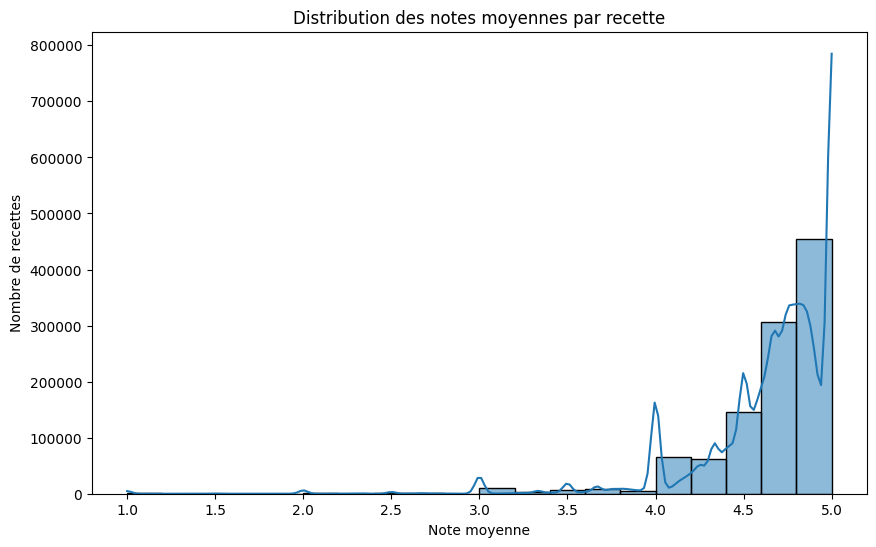

In [37]:
### etudions la variable average rating,nous allons commencer par visualiser la distribution des notes moyennes par recette.
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_rating'], bins=20, kde=True)
plt.title("Distribution des notes moyennes par recette")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de recettes")
plt.show()

Text(0.5, 0, 'User ID')

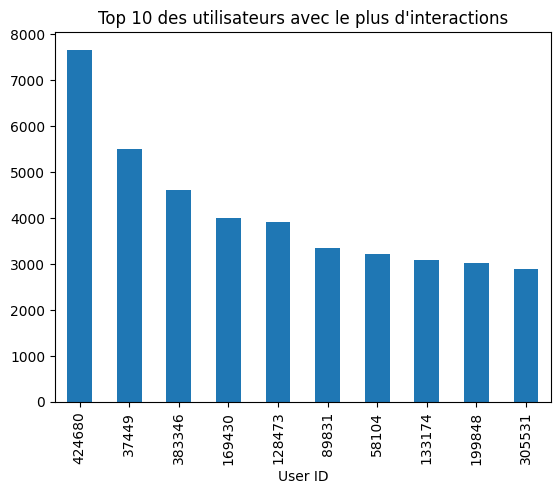

In [38]:
data['user_id'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des utilisateurs avec le plus d\'interactions')
plt.xlabel('User ID')

In [39]:
##Calculons la proportion des utilisateurs qui ont laissé moins de 2 avis
proportion_moins_de_2_avis = (data['user_id'].value_counts() < 2).mean() * 100
print(f"Proportion des utilisateurs ayant laissé moins de 2 avis : {proportion_moins_de_2_avis:.2f}%")

Proportion des utilisateurs ayant laissé moins de 2 avis : 75.38%


analyse de la variable UserID met en évidence une forte disparité d’activité sur la plateforme :

- 73,38 % des utilisateurs n’ont laissé qu’un seul avis, ce qui traduit un comportement ponctuel.
- Une minorité d’utilisateurs hyperactifs contribue à une part importante des évaluations (jusqu’à 7 671 avis pour le plus actif).

En conséquence, les analyses globales (par exemple la moyenne des notes) peuvent être biaisées par la surreprésentation des utilisateurs les plus actifs.

Il est donc crucial, dans la suite de l’étude, d’examiner le lien entre le niveau d’activité UserID et les notes attribuées Rating afin de vérifier si ces utilisateurs très actifs sont également ceux qui attribuent systématiquement les notes les plus élevées.

In [40]:
##
data.groupby('user_id')['rating'].mean().describe()

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_11472\2131936807.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('user_id')['rating'].mean().describe()


count    196098.000000
mean          4.557734
std           0.900728
min           1.000000
25%           4.500000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_11472\4001221394.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('user_id')['rating'].mean().hist(bins=30, rwidth=0.9)


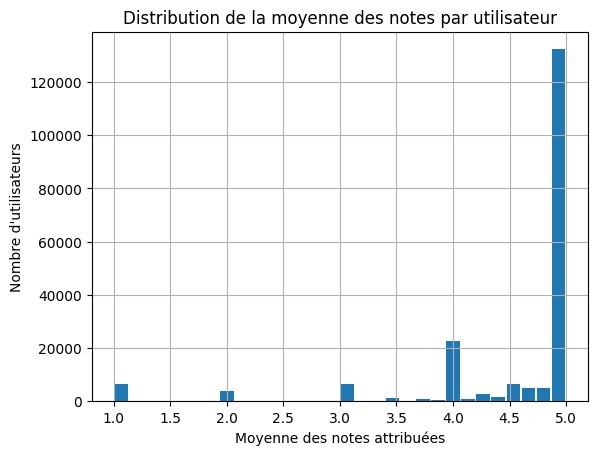

In [41]:
data.groupby('user_id')['rating'].mean().hist(bins=30, rwidth=0.9)
plt.title("Distribution de la moyenne des notes par utilisateur")
plt.xlabel("Moyenne des notes attribuées")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

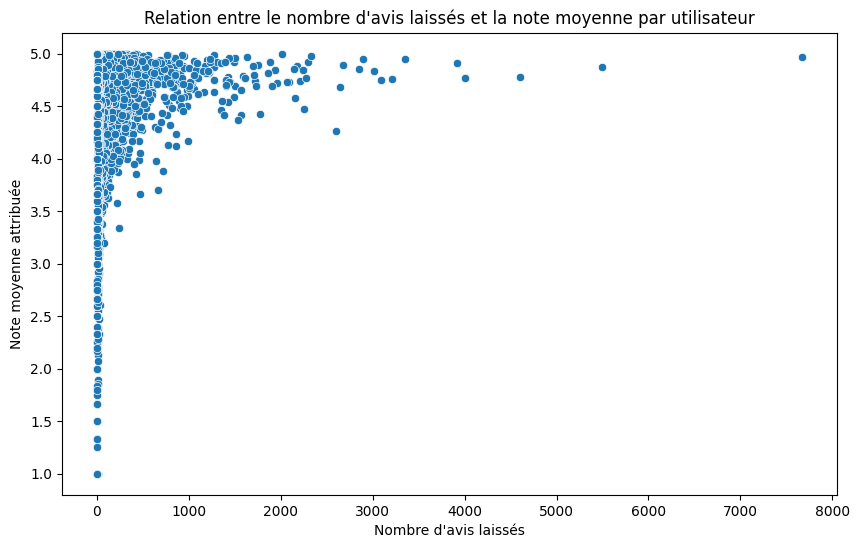

In [42]:
##relation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['user_id'].value_counts(), y=data.groupby('user_id', observed=True)['rating'].mean())
plt.title("Relation entre le nombre d'avis laissés et la note moyenne par utilisateur")
plt.xlabel("Nombre d'avis laissés")
plt.ylabel("Note moyenne attribuée")
plt.show()

In [43]:
##calculons la corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur
correlation = data['user_id'].value_counts().corr(data.groupby('user_id', observed=True)['rating'].mean())
print(f"Corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur : {correlation:.2f}")


Corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur : 0.01


In [44]:
##le percentiles jusqu'à 99% des interactions par utilisateur,et regardons apres par au notes moyennes au recettes afin de voir si les utilisateurs qui laissent le plus d'avis ont tendance a donner des notes plus élevées ou plus basses.
data['user_id'].value_counts().describe(percentiles=[.25, .5, .75, .95, .99])


count    226570.000000
mean          4.729311
std          49.084643
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
95%          10.000000
99%          59.000000
max        7665.000000
Name: count, dtype: float64

In [45]:
bins = [0, 1, 10, 60, float('inf')]
labels = ['Faible', 'Modérée', 'Haute', 'Extrême']
data['interaction_level'] = pd.cut(data['user_id'].map(data['user_id'].value_counts()), bins=bins, labels=labels)
data['interaction_level'].value_counts(normalize=True) * 100

interaction_level
Extrême    52.954495
Haute      18.980047
Modérée    14.970229
Faible     13.095229
Name: proportion, dtype: float64

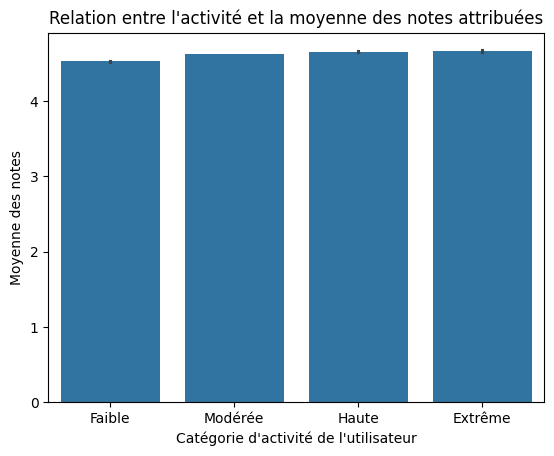

In [46]:
user_stats = data.groupby('user_id', observed=True).agg({'rating': 'mean', 'interaction_level': 'first'}).reset_index()
user_stats.rename(columns={'rating': 'note_moyenne'}, inplace=True)
sns.barplot(x='interaction_level', y='note_moyenne', data=user_stats, order=labels)
plt.title("Relation entre l'activité et la moyenne des notes attribuées")
plt.xlabel("Catégorie d'activité de l'utilisateur")
plt.ylabel("Moyenne des notes")
plt.show()


Les résultats montrent une distribution très homogène des notes :
quelle que soit la fréquence d’interaction d’un utilisateur, la moyenne des notes reste globalement stable, autour de 4.5 à 4.7.

Aucune tendance claire (ni croissante ni décroissante) n’apparaît entre le nombre d’avis laissés et la sévérité des notes attribuées.
Cette absence de corrélation suggère que le niveau d’activité n’a pas d’impact significatif sur la manière dont les utilisateurs notent les recettes.


In [55]:
import os
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, TreebankWordTokenizer
nltk.download('wordnet', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
nltk.download('omw-1.4', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
nltk.download('punkt', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
nltk.download('stopwords', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
stop_words = stopwords.words('english')


[nltk_data] Downloading package wordnet to c:\Users\ABDILLAHIOMARDJAMA
[nltk_data]     \Downloads\MangeTaMain\notebooks\nltk_data...
[nltk_data] Downloading package omw-1.4 to c:\Users\ABDILLAHIOMARDJAMA
[nltk_data]     \Downloads\MangeTaMain\notebooks\nltk_data...
[nltk_data] Downloading package punkt to c:\Users\ABDILLAHIOMARDJAMA\D
[nltk_data]     ownloads\MangeTaMain\notebooks\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to c:\Users\ABDILLAHIOMARDJA
[nltk_data]     MA\Downloads\MangeTaMain\notebooks\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [56]:
nltk.data.path.append(os.path.join(os.getcwd(), 'nltk_data'))

In [58]:
def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenisation
    tokens = word_tokenize(text)
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words or word ]
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoindre les tokens nettoyés en une seule chaîne de caractères
    cleaned_text = ' '.join(tokens)
    return cleaned_text